In [1]:
# Peter Kuurell
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


In [2]:
raw=Table.read_table('raw_compensation.csv')
raw.show(5)

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338


In [3]:
def num_string(x):
    y=x.strip('$')
    z=float(y)
    return z
    

In [4]:
newraw=raw.with_column('Total Pay',raw.apply(num_string,'Total Pay'))
newraw

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
1,Mark V. Hurd*,Oracle (Redwood City),53.25,(No previous year),$0.95,$52.27,$0.02,362
2,Safra A. Catz*,Oracle (Redwood City),53.24,(No previous year),$0.95,$52.27,$0.02,362
3,Robert A. Iger,Walt Disney (Burbank),44.91,-3%,$24.89,$17.28,$2.74,477
4,Marissa A. Mayer,Yahoo! (Sunnyvale),35.98,-15%,$1.00,$34.43,$0.55,342
5,Marc Benioff,salesforce.com (San Francisco),33.36,-16%,$4.65,$27.26,$1.45,338
6,John H. Hammergren,McKesson (San Francisco),24.84,-4%,$12.10,$12.37,$0.37,222
7,John S. Watson,Chevron (San Ramon),22.04,-15%,$4.31,$14.68,$3.05,183
8,Jeffrey Weiner,LinkedIn (Mountain View),19.86,27%,$2.47,$17.26,$0.13,182
9,John T. Chambers**,Cisco Systems (San Jose),19.62,19%,$5.10,$14.51,$0.01,170
10,John G. Stumpf,Wells Fargo (San Francisco),19.32,-10%,$6.80,$12.50,$0.02,256


In [5]:
avgpay=newraw.select('Total Pay')
newpay=avgpay.sum()
newpay
ceoavg=1167.42/102
ceoavg

C:\Users\STSC\anaconda3\lib\site-packages\datascience\tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


11.445294117647059

In [6]:
ceoname=newraw.select('Name','Total Pay')
ceofif=ceoname.where('Total Pay',are.above(15))
ceofif.sort('Total Pay',descending=True)

Name,Total Pay
Mark V. Hurd*,53.25
Safra A. Catz*,53.24
Robert A. Iger,44.91
Marissa A. Mayer,35.98
Marc Benioff,33.36
John H. Hammergren,24.84
John S. Watson,22.04
Jeffrey Weiner,19.86
John T. Chambers**,19.62
John G. Stumpf,19.32


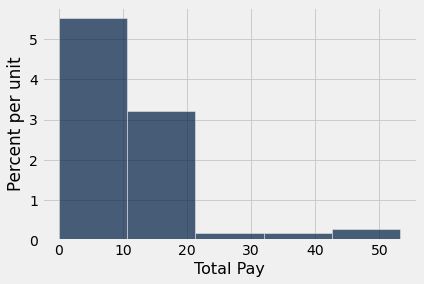

In [7]:
ceograph=newraw.select('Total Pay')
ceograph.hist('Total Pay',bins=(5))

In [8]:
cashraw=newraw.with_column('Cash Pay',newraw.apply(num_string,'Cash Pay'))
cashraw.with_column('percent cash', cashraw.column('Cash Pay') / cashraw.column('Total Pay'))

C:\Users\STSC\AppData\Local\Temp/ipykernel_16568/963536493.py:2: RuntimeWarning: invalid value encountered in true_divide
  cashraw.with_column('percent cash', cashraw.column('Cash Pay') / cashraw.column('Total Pay'))


Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,percent cash
1,Mark V. Hurd*,Oracle (Redwood City),53.25,(No previous year),0.95,$52.27,$0.02,362,0.0178404
2,Safra A. Catz*,Oracle (Redwood City),53.24,(No previous year),0.95,$52.27,$0.02,362,0.0178437
3,Robert A. Iger,Walt Disney (Burbank),44.91,-3%,24.89,$17.28,$2.74,477,0.55422
4,Marissa A. Mayer,Yahoo! (Sunnyvale),35.98,-15%,1,$34.43,$0.55,342,0.0277932
5,Marc Benioff,salesforce.com (San Francisco),33.36,-16%,4.65,$27.26,$1.45,338,0.139388
6,John H. Hammergren,McKesson (San Francisco),24.84,-4%,12.1,$12.37,$0.37,222,0.487118
7,John S. Watson,Chevron (San Ramon),22.04,-15%,4.31,$14.68,$3.05,183,0.195554
8,Jeffrey Weiner,LinkedIn (Mountain View),19.86,27%,2.47,$17.26,$0.13,182,0.124371
9,John T. Chambers**,Cisco Systems (San Jose),19.62,19%,5.1,$14.51,$0.01,170,0.259939
10,John G. Stumpf,Wells Fargo (San Francisco),19.32,-10%,6.8,$12.50,$0.02,256,0.351967
